<a href="https://colab.research.google.com/github/kianakiaei/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

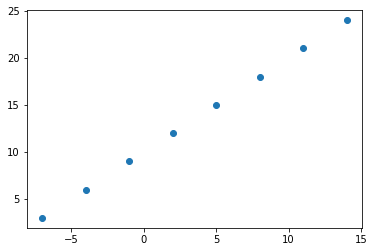

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [5]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes



In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [12]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [13]:
x[0].ndim

0

In [14]:
# Turn our NumPy arrays into tensors

x = tf.constant(x)
y = tf.constant(y)

x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

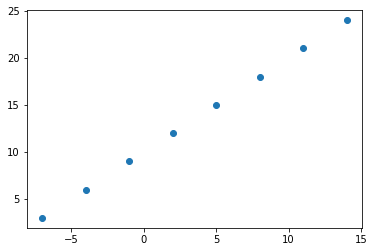

In [16]:
plt.scatter(x, y)

## Step in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hiddem layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others word, the function with tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model
3. **Fitting a model** - letting the model try to find patterns between x & y (features and labels). 

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

# 1. other way
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1)) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 672ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [20]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [23]:
# Add mae to y_pred
y_pred + 11

array([[23.71602]], dtype=float32)